## Import Depencdencies

In [10]:
# from tensorflow.keras.layers import Dense , Flatten 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.activations import relu,sigmoid,linear , softmax
# from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Pre Processing

In [11]:
(x_train , y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [27]:

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape

(60000, 784)

In [28]:
scalar = MinMaxScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [37]:
x_train = x_train.reshape(-1 , 28 , 28 , 1)
x_test = x_test.reshape(-1 , 28 , 28 ,1)
x_train.shape


(60000, 28, 28, 1)

In [38]:
tf.random.set_seed(1234) # for consistent results
model = tf.keras.models.Sequential([
    tf.keras.Input(x_train.shape[1:]),
    tf.keras.layers.Conv2D(16 , (3,3) , activation='relu'),
    tf.keras.layers.Conv2D(16 ,  (3,3) , activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax"),
    
])

In [42]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'] , 
)

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                294944    
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 297,754
Trainable params: 297,754
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(
    x_train,y_train,
    epochs=20 , 
    validation_data = (x_test, y_test)
)

Epoch 1/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9991

C:\Users\shadm\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 34s 18ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0807 - val_accuracy: 0.9873
Epoch 2/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0837 - val_accuracy: 0.9875
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1223 - val_accuracy: 0.9817
Epoch 4/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0909 - val_accuracy: 0.9865
Epoch 5/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1071 - val_accuracy: 0.9868
Epoch 6/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1207 - val_accuracy: 0.9854
Epoch 7/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1009 - val_accura

<function matplotlib.pyplot.show(close=None, block=None)>

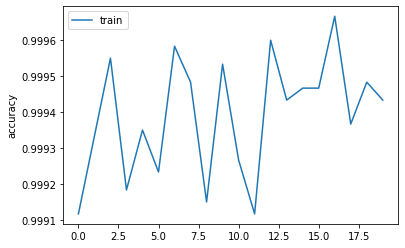

In [53]:
plt.plot(history.history['accuracy'],label='train')
plt.ylabel('accuracy')
plt.legend()
plt.show

In [55]:
probs = model.predict(x_test[:150])
preds = np.argmax(probs , axis=1)

3


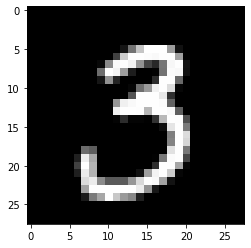

In [71]:
print(preds[90])
plt.imshow(x_test[90] , cmap='gray')